# –¢–µ–æ—Ä–∏—è 8. –ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å –∏ –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

### –ü–æ–ª–µ–∑–Ω–∞—è –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–∞

- [Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)
- [ODS - –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è](https://habrahabr.ru/company/ods/blog/322534/)
- [–ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä](http://www.machinelearning.ru/wiki/index.php?title=%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)
- [–ò–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è —Å—Ç–∞—Ç—å—è –ø—Ä–æ —Å–ø–∞–º/–Ω–µ —Å–ø–∞–º](https://habrahabr.ru/post/252265/)

–ï—Å–ª–∏ –≤–∞–º –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å –∑–∞–¥–∞—á–∞ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤, —Ç–æ –≤–æ—Ç –ø–æ–¥–±–æ—Ä–æ—á–∫–∞:

- [–±–∏–±–ª–∏–æ—Ç–µ–∫–∞ Gensim](https://radimrehurek.com/gensim/)
- [–±–∏–±–ª–∏–æ—Ç–µ–∫–∞ nltk](http://www.nltk.org/)
- [–õ–µ–∫—Ü–∏—è –ø—Ä–æ word2vec üî•](https://www.youtube.com/watch?v=oBb9aFmp0Hs)
- [–õ–µ–∫—Ü–∏—è –í–µ–∫—Ç–æ—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è —Å–ª–æ–≤ –∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ üî•](https://www.youtube.com/watch?v=hiDBnEyoZS4)

### –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

–ù–∞ –ø—Ä–∏–º–µ—Ä–µ [–¥–∞—Ç–∞—Å–µ—Ç–∞ SMS —Å–ø–∞–º–∞](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection) –Ω–∞—É—á–∏–º –Ω–∞—à –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ—Ç–ª–∏—á–∞—Ç—å —Å–ø–∞–º –æ—Ç –æ–±—ã—á–Ω–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è. –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –ù–∞–∏–≤–Ω—ã–π –±–∞–π–µ—Å–æ–≤—Å–∫–∏–π –º–µ—Ç–æ–¥ —Ä–µ—à–∞–µ—Ç —ç—Ç—É –∑–∞–¥–∞—á—É –∏ kNN. 

In [70]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
colab = False # –µ—Å–ª–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç–µ –Ω–∞ —Å–≤–æ—ë–º –∫–æ–º–ø—å—é—Ç–µ—Ä–µ, –ø–æ—Å—Ç–∞–≤—å—Ç–µ False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

In [72]:
if colab:
    data = pd.read_csv('/content/drive/My Drive/data/SMSSpamCollection.tsv.gz', compression='gzip', sep='\t', header=None, names=['target', 'text'])
else:
    data = pd.read_csv("../data/SMSSpamCollection.tsv.gz", compression='gzip', sep='\t', header=None, names=['target', 'text'])

data

target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will √º b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [73]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–∏–ø–∏—á–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π –¥–∞—Ç–∞—Å–µ—Ç–∞
print(data['target'][2],":", data['text'][2])
print()
print(data['target'][13],":", data['text'][13])

spam : Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

ham : I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.


<Axes: xlabel='count', ylabel='target'>

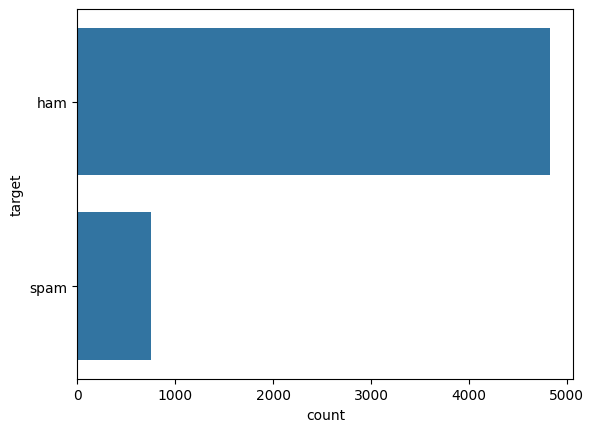

In [74]:
sns.countplot(data['target'])

In [75]:
data['len'] = data['text'].apply(len)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

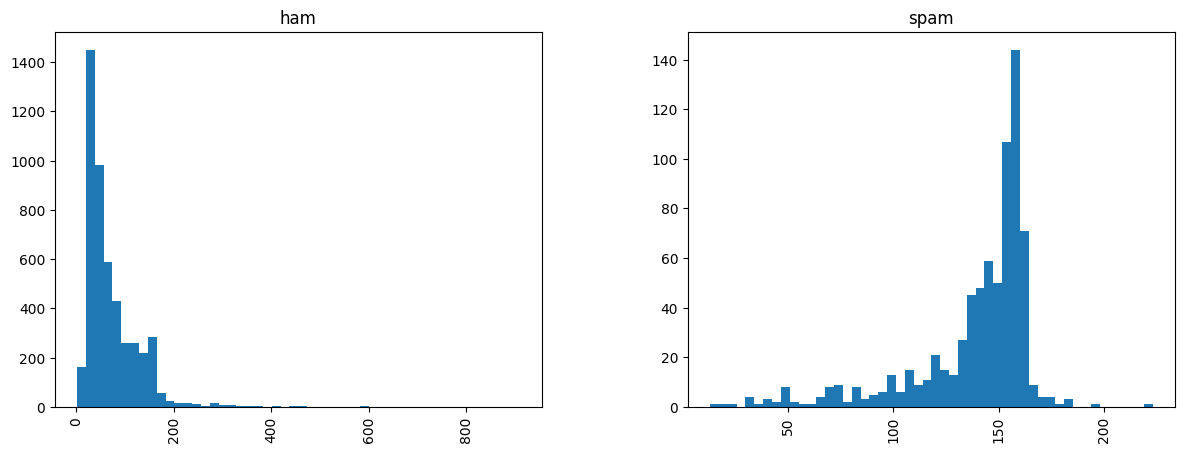

In [76]:
data.hist(column='len', by='target', bins=50,figsize=(14,5))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

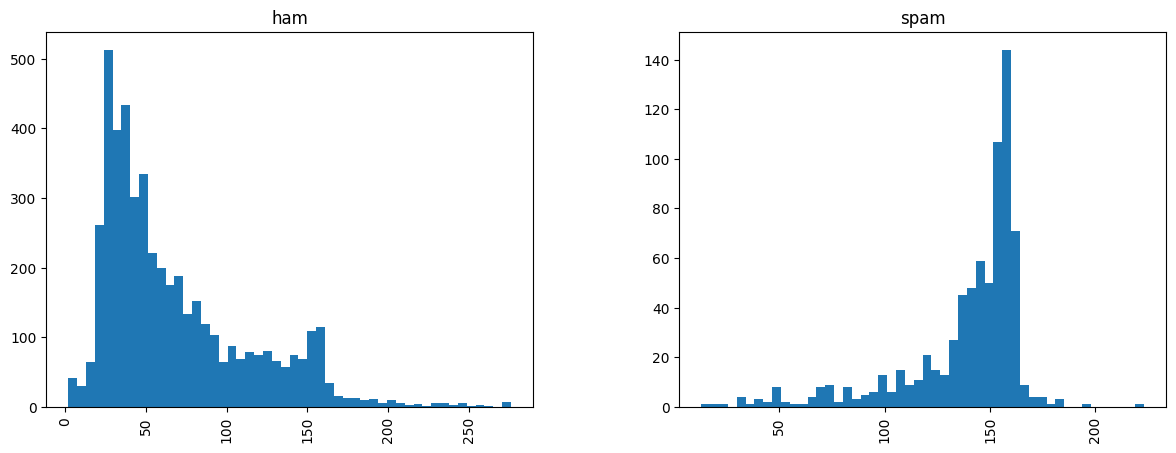

In [77]:
# –∫–∞–∫–∏–µ-—Ç–æ —Å—Ç—Ä–∞–Ω–Ω—ã–µ –¥–ª–∏–Ω–Ω—ã–µ —Å–º—Å-–∫–∏. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ-–¥—Ä—É–≥–æ–º—É.
data[data['len'] < 280].hist(column='len', by='target', bins=50,figsize=(14,5))

### –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç–µ–∫—Å—Ç–∞ 


![](https://cs5.pikabu.ru/images/previews_comm/2015-10_5/144549937818821131.jpg)

–ê–ª–≥–æ—Ä–∏—Ç–º—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è —Ä–∞–±–æ—Ç–∞—é—Ç —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –ï—Å–ª–∏ –∂–µ —É –Ω–∞—Å —Ç–µ–∫—Å—Ç, –µ–≥–æ –Ω–∞–¥–æ –∫–∞–∫-—Ç–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —á–∏—Å–ª–æ–≤–æ–º—É –≤–∏–¥—É. –î–ª—è —ç—Ç–æ–≥–æ —Ç–µ–∫—Å—Ç –ø—Ä–æ—Ö–æ–¥–∏—Ç –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É, –≤ –∫–æ—Ç–æ—Ä–æ–π –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–∞–¥–∏–∏:

1. **–¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è**: –≤—ã–¥–µ–ª–µ–Ω–∏–µ –∏–∑ —Ç–µ–∫—Å—Ç–∞ —Å–ª–æ–≤ (—Ç–æ–∫–µ–Ω–æ–≤), –Ω–∞–ø—Ä–∏–º–µ—Ä —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—É–ª—è—Ä–Ω—ã—Ö –≤—ã—Ä–∞–∂–µ–Ω–∏–π.
2. **–û—Ç—Å–µ—á–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤**: —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Å–ª–∏—à–∫–æ–º —á–∞—Å—Ç–æ, –Ω–µ –Ω–µ—Å—É—Ç –Ω–∏–∫–∞–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —Ç–æ–ª—å–∫–æ –∑–∞—à—É–º–ª—è—é—Ç –¥–∞–Ω–Ω—ã–µ, –∏ –∏—Ö –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å. –≠—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –ø–æ–º–æ—â—å—é —Å–ª–æ–≤–∞—Ä—è —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏–ª–∏ –ø—Ä–æ—Å—Ç–æ –æ—Ç—Å–µ–∫–∞—è —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö —á–∞—â–µ –≤—Å–µ–≥–æ.
3. **–°—Ç–µ–º–º–∏–Ω–≥/–ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è**: –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å–ª–æ–≤ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ, —á—Ç–æ–±—ã –∏–≥—Ä–æ—Ä–∏—Ä–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–∏—è –≤–æ –≤—Ä–µ–º–µ–Ω–∞—Ö, —á–∏—Å–ª–∞—Ö, –ø–∞–¥–µ–∂–∞—Ö –∏ –ø—Ä–æ—á–µ–µ. –ü—Ä–∏ —Å—Ç–µ–º–º–∏–Ω–≥–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∞–ª–≥–æ—Ä–∏—Ç–º, –æ—Ç—Å–µ–∫–∞—é—â–∏–π —Å—É—Ñ—Ñ–∏–∫—Å—ã (–∫–æ—Ç–æ—Ä—ã–π, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç books –≤ book, leaves –≤ leav, –∞ was –≤ wa), –ø—Ä–∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ - —Å–ª–æ–≤–∞—Ä—å, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª–∏—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å —ç—Ç—É —Ä–∞–±–æ—Ç—É –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ (–Ω–æ –∑–∞ –±–æ–ª—å—à–µ–µ –≤—Ä–µ–º—è, –∏, —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ, –Ω—É–∂–µ–Ω —Å–ª–æ–≤–∞—Ä—å).
4. **–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è**: —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ —Ç–æ, —Ä–∞–¥–∏ —á–µ–≥–æ –≤—Å—ë –∑–∞—Ç–µ–≤–∞–ª–æ—Å—å $-$ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–∞–±–æ—Ä–∞ —Å–ª–æ–≤ –≤ –Ω–∞–±–æ—Ä —á–∏—Å–µ–ª. –î–≤—É–º—è –ø—Ä–æ—Å—Ç–µ–π—à–∏–º–∏ –ø–æ–¥—Ö–æ–¥–∞–º–∏ —è–≤–ª—è—é—Ç—Å—è bag-of-words, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –ø—Ä–æ—Å—Ç–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è, –∫–∞–∫ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—Ç–∏–ª–æ—Å—å –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ, –∏ TF-IDF (term frequency - inverse document frequency), –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –±–æ–ª—å—à–∏–π –≤–µ—Å –¥–∞—ë—Ç—Å—è —Ç–µ–º —Å–ª–æ–≤–∞–º, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö –±–æ–ª–µ–µ —Ä–µ–¥–∫–æ.

–í—Ç–æ—Ä–æ–π –∏ —Ç—Ä–µ—Ç–∏–π —ç—Ç–∞–ø—ã –º–æ–∂–Ω–æ –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å.

__–∏—Å—Ç–æ—á–Ω–∏–∫: –º–∞—Ç–µ—Ä–∏–∞–ª—ã –∫—É—Ä—Å–∞ [ODS](https://github.com/Yorko/mlcourse.ai)__


[–ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Ç–µ–∫—Å—Ç–∞ –≤ Sklearn](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

[–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–µ—à–∫–∞ —Å–ª–æ–≤, TF-IDF –∏ Word2Vec](http://ijaerd.com/papers/finished_papers/A_review_of_feature_extraction_methods_for_text_classification-IJAERDV05I0489982.pdf)

#### Count Vectorizer (–ú–µ—à–æ–∫ —Å–ª–æ–≤)

[–î–æ–∫–∏ –ø–æ CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)

–ú–æ–∂–Ω–æ –Ω–∞—á–∞—Ç—å —Å –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ–π –∏–¥–µ–∏. –î–∞–≤–∞–π—Ç–µ —Ä–∞–∑–æ–±—ä–µ–º –≤—Å–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –Ω–∞ —Å–ª–æ–≤–∞. –°–æ—Å—Ç–∞–≤–∏–º —Å–ª–æ–≤–∞—Ä—å –≤—Å–µ—Ö —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –≤—Å—Ç—Ä–µ—á–∞—Ç—å—Å—è –≤–æ –≤—Å–µ—Ö  –Ω–∞—à–∏—Ö —Ç–µ–∫—Å—Ç–∞—Ö. –ò –æ—Ç–º–µ—Ç–∏–º, –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –ª–∏ —ç—Ç–æ —Å–ª–æ–≤–æ –≤ –Ω–∞—à–µ–º –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ.  
–î—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏. –ü—É—Å—Ç—å –≤ —Ç–∞–±–ª–∏—Ü–µ –≤ —Å—Ç—Ä–æ–∫–∞—Ö –±—É–¥—É—Ç –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è, –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö - —Å–ª–æ–≤–∞, –∞ –≤ —è—á–µ–π–∫–∞—Ö —á–∏—Å–ª–æ, –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ —ç—Ç–æ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–ª–æ—Å—å –≤ —ç—Ç–æ–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–∏. –ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –∫–∞–∂–¥–æ–º—É –æ–±—ä–µ–∫—Ç—É –≤—ã–±–æ—Ä–∫–∏ –±—É–¥–µ—Ç —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω –≤–µ–∫—Ç–æ—Ä.



In [78]:
count_vectorizer = CountVectorizer()
texts = [
    "I've been searching for the right words to thank you for this breather.",
    "You have been wonderful and a blessing at all times",
    "I promise i wont take your help for granted and will fulfil my promise."
]
bow = count_vectorizer.fit_transform(texts)
print("Shape=", bow.shape)

Shape= (3, 28)


In [79]:
count_vectorizer.vocabulary_

{'ve': 21,
 'been': 3,
 'searching': 14,
 'for': 6,
 'the': 17,
 'right': 13,
 'words': 25,
 'to': 20,
 'thank': 16,
 'you': 26,
 'this': 18,
 'breather': 5,
 'have': 9,
 'wonderful': 23,
 'and': 1,
 'blessing': 4,
 'at': 2,
 'all': 0,
 'times': 19,
 'promise': 12,
 'wont': 24,
 'take': 15,
 'your': 27,
 'help': 10,
 'granted': 8,
 'will': 22,
 'fulfil': 7,
 'my': 11}

–¢–µ–ø–µ—Ä—å —Å–æ—Å—Ç–∞–≤–∏–º —Ç—É —Å–∞–º—É—é –º–∞—Ç—Ä–∏—Ü—É, –≥–¥–µ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö —Å–ª–æ–≤–∞, –∞ –≤ —Å—Ç—Ä–æ–∫–∞—Ö —Ç–µ–∫—Å—Ç—ã.  
–ö–∞–∫ –º—ã –≤–∏–¥–∏–º –≤ –ø–µ—Ä–≤–æ–º –∏ –≤—Ç–æ—Ä–æ–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è—Ö –µ—Å—Ç—å —Å–ª–æ–≤–æ "been", –∞ –≤ —Ç—Ä–µ—Ç—å–µ–º –µ–≥–æ –Ω–µ—Ç.

In [80]:
bow.todense()

matrix([[0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
         1, 0, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 1, 0, 1, 0, 0, 1]], dtype=int64)

–ú–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å "—Å—Ç–æ–ø —Å–ª–æ–≤–∞" - —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –Ω–µ—Å—É—Ç –æ—Å–æ–±—ã–π —Å–º—ã—Å–ª, –Ω–æ –Ω—É–∂–Ω—ã –¥–ª—è –≥—Ä–∞–º–º–∞—Ç–∏–∫–∏.

In [81]:
count_vectorizer = CountVectorizer(stop_words='english')
bow = count_vectorizer.fit_transform(texts)
print("Shape=", bow.shape)
count_vectorizer.vocabulary_

Shape= (3, 14)


{'ve': 10,
 'searching': 7,
 'right': 6,
 'words': 13,
 'thank': 8,
 'breather': 1,
 'wonderful': 11,
 'blessing': 0,
 'times': 9,
 'promise': 5,
 'wont': 12,
 'help': 4,
 'granted': 3,
 'fulfil': 2}

–î–∞–ª—å—à–µ –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é, —Å—Ç–µ–º–º–∏–Ω–≥ –∏ –º–Ω–æ–≥–æ —á–µ–≥–æ –¥—Ä—É–≥–æ–≥–æ. –ù–æ –ø–æ–∫–∞ –æ—Å—Ç–∞–Ω–æ–≤–∏–º—Å—è –Ω–∞ —ç—Ç–æ–º –∏ –≤–µ—Ä–Ω–µ–º—Å—è –∫ —Å–ø–∞–º—É.

In [82]:
y = data['target']
X = data['text']

–ú–æ–∂–Ω–æ –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å —Å–ª–æ–≤–∞—Ä—å —Å–≤–µ—Ä—Ö—É –∏ —Å–Ω–∏–∑—É.  
–í—ã–∫–∏–Ω—É—Ç—å –æ—á–µ–Ω—å —á–∞—Å—Ç–æ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏–µ—Å—è —Å–ª–æ–≤–∞ –∏ –æ—á–µ–Ω—å —Ä–µ–¥–∫–∏–µ. –ß—Ç–æ –∫—Å—Ç–∞—Ç–∏ –ª–æ–≥–∏—á–Ω–æ, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–∏ —Å–ª–æ–≤–∞ –Ω–µ –Ω–µ—Å—É—Ç –Ω–∏–∫–∞–∫–æ–≥–æ —Å–º—ã—Å–ª–∞.

```
max_df : float in range [0.0, 1.0] or int, default=1.0
    When building the vocabulary ignore terms that have a document
    frequency strictly higher than the given threshold (corpus-specific
    stop words).
    If float, the parameter represents a proportion of documents, integer
    absolute counts.
    This parameter is ignored if vocabulary is not None.

min_df : float in range [0.0, 1.0] or int, default=1
    When building the vocabulary ignore terms that have a document
    frequency strictly lower than the given threshold. This value is also
    called cut-off in the literature.
    If float, the parameter represents a proportion of documents, integer
    absolute counts.
    This parameter is ignored if vocabulary is not None.
```

In [83]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_vector = vectorizer.fit_transform(X)

In [84]:
X_vector

<5572x3965 sparse matrix of type '<class 'numpy.int64'>'
	with 39099 stored elements in Compressed Sparse Row format>

In [85]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [86]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ: ", len(vectorizer.vocabulary_))
X_vector.shape

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ:  3965


(5572, 3965)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Å–ª–æ–≤–∞

In [87]:
# sorted(vectorizer.vocabulary_.items(), key=lambda x_test_example: x[1], reverse=True)[:50]

frequent_words = pd.DataFrame(columns=['Word', 'Count'])
frequent_words['Word'] = vectorizer.get_feature_names_out() 
frequent_words['Count'] = X_vector.toarray().sum(axis=0)
frequent_words = frequent_words.iloc[np.argsort(frequent_words['Count'], )][:-50:-1]


–ß—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, —Ö—É–∂–µ —á–µ–≥–æ –Ω–µ–ª—å–∑—è –±—ã—Ç—å, –≤–æ–∑—å–º–µ–º –≥–ª—É–ø—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –≤—Å–µ —Å–ø–∞–º.

In [88]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()
%time cross_val_score(dm, X_vector, y, cv=3).mean()

CPU times: total: 46.9 ms
Wall time: 66.2 ms


0.8659368183575603

–î–∞–ª–µ–µ –≤–æ–∑—å–º–µ–º –∏–∑–≤–µ—Å—Ç–Ω—ã–π –Ω–∞–º K –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π.

In [89]:
from sklearn.neighbors import KNeighborsClassifier

%time cross_val_score(KNeighborsClassifier(n_neighbors=42, n_jobs=4), X_vector, y, cv=3).mean()

CPU times: total: 2.25 s
Wall time: 2.41 s


0.8659368183575603

## –ê —á—Ç–æ —Å–∫–∞–∂–µ—Ç –ë–∞–π–µ—Å?

![](https://i.pinimg.com/736x/22/7e/52/227e52ea4622a62344f1bc0a31111f43--bayes-theorem-game-theory.jpg)

$\LARGE P(A|B) = \frac{P(AB)}{P(B)} =  \frac{P(B \mid A)\, P(A)}{P(B)}$

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –æ–¥–∏–Ω –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞

### –ù–∞–∏–≤–Ω—ã–π –±–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
–û—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ –ø—Ä–æ —Ç–µ–æ—Ä–∏—é –Ω–∞–ø–∏—Å–∞–Ω–æ [—Ç—É—Ç](http://bazhenov.me/blog/2012/06/11/naive-bayes.html). –ü–æ–ø—Ä–æ–±—É–µ–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –ø–æ —ç—Ç–æ–π —Å—Ç–∞—Ç—å–µ.

–ú–æ–¥–µ–ª—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ —Å—Ç—Ä–æ–∏—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏. 
–ü–æ –Ω–µ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–∞–π—Ç–∏ —Å–ª–µ–¥—É—é—â—é—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É:  
1. –ß–∞—Å—Ç–æ—Ç—ã –∫–ª–∞—Å—Å–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ –æ–±—ä–µ–∫—Ç–æ–≤ (—Å–∫–æ–ª—å–∫–æ –æ–±—ä–µ–∫—Ç–æ–≤ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç –∫–∞–∂–¥–æ–º—É –∏–∑ –∫–ª–∞—Å—Å–æ–≤)  (`classes_stats`)
2. C—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ —Å–ª–æ–≤ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ (`words_per_class`, –¥–∞–ª–µ–µ —Å–º. $L_c$)
3. –ß–∞—Å—Ç–æ—Ç—ã —Å–ª–æ–≤ –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ (`word_freqs_per_class`, –¥–∞–ª–µ–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ $W_{ic}$)
4. –†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è –≤—ã–±–æ—Ä–∫–∏ (—á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) - –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –≤ –≤—ã–±–æ—Ä–∫–µ (`num_features`)

–ü–æ —Å—É—Ç–∏, —ç—Ç–æ –º–µ—Ç–æ–¥ `fit` –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞.

–ù–∞ —ç—Ç–∞–ø–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—É–ª–æ–π:

$$
\begin{equation}
predicted\ class = \operatorname*{arg\max}_{c \in C} \left[\log{{D_c} \over {D}} + \sum_{i \in Q}{\log{{W_{ic} + 1} \over {|V| + L_c}}}\right]
\end{equation}
$$

–ü–æ—è—Å–Ω–∏–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ —ç—Ç–æ–º –≤—ã—Ä–∞–∂–µ–Ω–∏–∏:  
$D_c$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –≤ –æ–±—É—á. –≤—ã–±–æ—Ä–∫–µ $\in$ –∫–ª–∞—Å—Å—É $c$

$D$ - —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ –±—ã–ª–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –≤ –æ–±—É—á. –≤—ã–±–æ—Ä–∫–µ

$|V|$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –≤–æ —Å–µ—Ö –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –æ–±—É—á. –≤—ã–±–æ—Ä–∫–∏

$L_c$ - c—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ —Å–ª–æ–≤ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –∫–ª–∞—Å—Å–∞ $c$ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
 
$W_{ic}$ - —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ $i$ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—Ç–∏–ª–æ—Å—å –≤ –æ–±—ä–µ–∫—Ç–∞—Ö –∫–ª–∞—Å—Å–∞ $c$ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏

$Q$ - –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–ª–æ–≤ _–∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º–æ–≥–æ_ –¥–æ–∫—É–º–µ–Ω—Ç–∞




In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, random_state=42, test_size=0.5)

–û–±—â–∞—è —Å–∏–≥–Ω–∞—Ç—É—Ä–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ —Ç–∞–∫–æ–≤–∞:  
```python
class NaiveBayes:
    def fit(self, x, y) -> None

    def predict(self, x) -> List[str]
```

–ù–∞–π–¥–µ–º –¥–ª—è –Ω–∞—á–∞–ª–∞ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏, –æ–ø–∏—Å–∞–Ω–Ω—ã–µ –≤ —Ä–∞–∑–¥–µ–ª–µ –∏ –≤ —Å–∞–º–æ–º –º–∞—Ç–µ—Ä–∏–∞–ª–µ –ø–æ —Å—Å—ã–ª–∫–µ

–û–±—â–µ–µ —á–∏—Å–ª–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (`doc_num`)

In [91]:
doc_num = X_train.shape[0]
doc_num

2786

–°–ª–æ–≤–∞—Ä—å, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ (`classes_stats`)

In [92]:
classes_stats = dict(zip(*np.unique(y_train, return_counts=True)))
classes_stats

{'ham': 2409, 'spam': 377}

–ß–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Å–ª–æ–≤) –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ (`num_features`)

In [93]:
num_features = X_train.shape[1]
num_features

3965

–°–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä—å `indexes`, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–ª—é—á–æ–º –±—É–¥–µ—Ç —è–≤–ª—è—Ç—å—Å—è –∏–º—è –∫–ª–∞—Å—Å–∞, –∞ –∑–Ω–∞—á–µ–Ω–∏–µ–º –∫–ª—é—á–∞ - —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–æ–∫ –º–∞—Ç—Ä–∏—Ü—ã X, –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—â–∏—Ö –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É –∫–ª–∞—Å—Å—É

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `y` - —ç—Ç–æ –æ–±—ä–µ–∫—Ç `Series` —Å–æ —Å–º–µ—Å—Ç–∏–≤—à–µ–π—Å—è –∏–Ω–¥–µ–∫—Å–∞—Ü–∏–µ–π. –≠—Ç–æ –∏–Ω–¥–µ–∫—Å–∞—Ü–∏—é –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å–ø—Ä–∞–≤–∏—Ç—å, –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞–≤—à–∏—Å—å `Series.reset_index(drop=True)`

In [94]:
y = y_train.reset_index(drop=True)

indexes = {class_label: list(y.index[y == class_label]) for class_label in y.unique()}

indexes

{'ham': [0,
  1,
  2,
  4,
  5,
  7,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  23,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  37,
  38,
  39,
  40,
  42,
  43,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  95,
  96,
  97,
  98,
  99,
  101,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  120,
  121,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  169,
  171,
  172,
  173,
  176,
  177,
  178,
  179,

–ò—Å–ø–æ–ª—å–∑—É—è –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –≤—ã—à–µ –∏–Ω–¥–µ–∫—Å—ã, –ø–æ–¥—Å—á–∏—Ç–∞–µ–º –¥–≤–∞ –≤–∞–∂–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `words_per_class` –∏ `word_freqs_per_class`.  
–û–±–µ —ç—Ç–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —è–≤–ª—è—é—Ç—Å—è —Å–ª–æ–≤–∞—Ä—è–º–∏, –Ω–æ –ø–µ—Ä–≤–∞—è –∏–∑ –Ω–∏—Ö –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ —Å—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ —Å–ª–æ–≤, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –≤ **–∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ**, –∞ –≤—Ç–æ—Ä–∞—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—Ç–∏–ª–æ—Å—å –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞.  –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —Ñ–æ—Ä–º–∞—Ç –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `words_per_class` - `{str: int}`, —Ñ–æ—Ä–º–∞—Ç `word_freqs_per_class` - `{str: List}`.
–ú—ã —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –æ–±—ä–µ–¥–µ–Ω–∏–ª–∏ –ø–æ–∏—Å–∫ –¥–≤—É—Ö —Ä–∞–∑–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –≤ –æ–¥–Ω–æ–º –±–ª–æ–∫–µ, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ª–∏—à–Ω–∏—Ö —Ü–∏–∫–ª–æ–≤.

–ß—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –≤ X —Å—Ç—Ä–æ–∫–∏, –æ—Ç–Ω–æ—Å—è—â–∏–µ—Å—è –∫ —Ç–æ–º—É –∏–ª–∏ –∏–Ω–æ–º—É –∫–ª–∞—Å—Å—É, –≤–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å –ø–æ–∏—Å–∫–æ–º –ø–æ –º–∞—Å–∫–µ `indexes` –¥–ª—è –Ω—É–∂–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞.

–¢–∞–∫–∂–µ –ø–æ–º–Ω–∏—Ç–µ, —á—Ç–æ X - —ç—Ç–æ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞, –Ω–æ –∏–∑ –Ω–µ–µ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –æ–±—ã—á–Ω—ã–π –º–∞—Å—Å–∏–≤ —á–µ—Ä–µ–∑ –º–µ—Ç–æ–¥ `toarray()`

In [95]:
x_arr = X_train.toarray()

words_per_class = {}
word_freqs_per_class = {}

for class_label, indices in indexes.items():
    class_data = x_arr[indices]
    
    # –°—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ —Å–ª–æ–≤ –≤ –∫–ª–∞—Å—Å–µ
    words_per_class[class_label] = class_data.sum()
    
    # –ß–∞—Å—Ç–æ—Ç–∞ –ø–æ—è–≤–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö
    word_freqs_per_class[class_label] = class_data.sum(axis=0).tolist()

words_per_class, word_freqs_per_class

({'ham': 15349, 'spam': 5435},
 {'ham': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   7,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   4,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   8,
   0,
   0,
   0,
  

–í—Å–µ –≤—ã—à–µ–Ω–∞–ø–∏—Å–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –æ–±—Ä–∞–∑—É—é—Ç –º–µ—Ç–æ–¥ `fit` –±—É–¥—É—â–µ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞. –¢–µ–ø–µ—Ä—å –≤–Ω–µ—Å–∏—Ç–µ —ç—Ç–æ—Ç –∫–æ–¥ –≤ –º–µ—Ç–æ–¥ `fit`, –∏ –Ω–µ –∑–∞–±—É–¥—å—Ç–µ —Å–¥–µ–ª–∞—Ç—å –Ω–∞–π–¥–µ–Ω–Ω—ã–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–æ–ª—è–º–∏ –∫–ª–∞—Å—Å–∞.

In [96]:
class NaiveBayes:
    def __init__(self):
        self.classes_stats = None
        self.doc_num = None
        self.num_features = None
        self.words_per_class = None
        self.word_freqs_per_class = None
        self.indexes = None
        
    def fit(self, x, y):
        self.indexes = {class_label: list(y.index[y == class_label]) for class_label in y.unique()}

        self.doc_num = X.shape[0]

        self.num_features = X.shape[1]

        X_arr = X.toarray()

        for class_label, indices in self.indexes.items():
            class_data = X_arr[indices]
            
            self.words_per_class[class_label] = class_data.sum()

            self.word_freqs_per_class[class_label] = class_data.sum(axis=0).tolist()

        self.classes_stats = {class_label: len(indices) for class_label, indices in self.indexes.items()}



–¢–µ–ø–µ—Ä—å —Ä–µ–∞–ª–∏–∑—É–µ–º –º–µ—Ç–æ–¥ `predict`. –ï—Å–ª–∏ –≤—ã –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ —á–∏—Ç–∞–ª–∏ —Å—Ç–∞—Ç—å—é, —Ç–æ –∑–∞–º–µ—Ç–∏–ª–∏, —á—Ç–æ –≤ –ø—Ä–∏–º–µ—Ä–µ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–µ —á–∏—Å—Ç—ã–µ _–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏_ –∫–ª–∞—Å—Å–æ–≤, –∞ –≤—Å–µ–≥–æ –ª–∏—à—å —á–∏—Å–ª–æ–≤—ã–µ –æ—Ü–µ–Ω–∫–∏. –î–∞–ª–µ–µ —ç—Ç–∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–∂–Ω–æ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Å–æ—Ñ—Ç–º–∞–∫—Å–∞, –Ω–æ –º—ã —ç—Ç–æ–≥–æ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º.

–¢–æ–≥–¥–∞ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–π –≤—ã—Ö–æ–¥ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –æ–±–æ–∑–Ω–∞—á–∏–º —Ç–∞–∫:

`pred_per_class = [{–∫–ª–∞—Å—Å: –æ—Ü–µ–Ω–∫–∞}, ... , {–∫–ª–∞—Å—Å: –æ—Ü–µ–Ω–∫–∞}]`

–ü–æ–ª—É—á–∞—è –Ω–æ–≤—É—é –æ—Ü–µ–Ω–∫—É –¥–ª—è –∫–ª–∞—Å—Å–∞, –º—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º –µ–µ —Å —É–∂–µ –∏–º–µ—é—â–µ–π—Å—è –≤ –º–∞—Å—Å–∏–≤–µ. –ï—Å–ª–∏ –æ–Ω–∞ –±–æ–ª—å—à–µ, —Ç–æ –ø–µ—Ä–µ–∑–∞–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ. –ò–Ω–¥–µ–∫—Å —Å–ª–æ–≤–∞—Ä–∏–∫–∞ = –∏–Ω–¥–µ–∫—Å—É  —Å—Ç—Ä–æ–∫–∏ –≤ –º–∞—Ç—Ä–∏—Ü–µ –•./

–ù–µ –∑–∞–±—É–¥—å—Ç–µ –æ —Å–ª–µ–¥—É—é—â–∏—Ö –≤–µ—â–∞—Ö:
- `X_test` - —ç—Ç–æ —Ç–∞–∫–∞—è –∂–µ —Ä–∞–∑—Ä—è–∂–µ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞, –Ω—É–∂–Ω–æ –ø—Ä–µ–≤—Ä–∞—Ç–∏—Ç—å –µ–µ –≤ —Å–ø–∏—Å–æ–∫
- –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è $ {D_c} \over {D} $ –æ–¥–∏–Ω–∞–∫–æ–≤–∞ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞.
- –ß—Ç–æ–±—ã –ø–æ–¥—Å—á–∏—Ç–∞—Ç—å $W_{ic}$ –≤–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å `word_freqs_per_class`.
- –ß—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ —ç–ª–µ–º–µ–Ω—Ç—ã –≤–∞–º –Ω—É–∂–Ω–æ –±—Ä–∞—Ç—å –≤ `word_freqs_per_class`, –Ω–∞–π–¥–∏—Ç–µ –∏–Ω–¥–µ–∫—Å—ã –Ω–µ–Ω—É–ª–µ–≤—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º–æ–π —Å—Ç—Ä–æ–∫–µ - –µ—Å–ª–∏ —ç—Ç–∏ —ç–ª–µ–º–µ–Ω—Ç—ã –Ω–µ–Ω—É–ª–µ–≤—ã–µ, –∑–Ω–∞—á–∏—Ç, —Ç–∞–º –±—ã–ª–æ –∫–∞–∫–æ–µ-—Ç–æ —Å–ª–æ–≤–æ (–ª–æ–≥–∏—á–Ω–æ, –Ω–µ –ø—Ä–∞–≤–¥–∞ –ª–∏?)

–¢–µ–ø–µ—Ä—å –ø—Ä–æ—Å—Ç–æ –≤—ã–±–µ—Ä–∏—Ç–µ –∫–ª–∞—Å—Å —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ—Ü–µ–Ω–∫–æ–π, –∏ —Å—Ñ–æ—Ä–º–∏—Ä—É–π—Ç–µ —Å–ø–∏—Å–æ–∫ –∫–ª–∞—Å—Å–æ–≤.

In [97]:
import math

def predict(x):
    X_test_arr = x.toarray()
    pred_per_class = []

    for X_example in X_test_arr:
        class_scores = []

        for class_label in classes_stats:
            p_class = math.log(classes_stats[class_label] / doc_num)
            p_words = 0
            non_zero_indices = np.nonzero(X_example)[0]

            for i in non_zero_indices:
                word_freq = word_freqs_per_class[class_label][i]
                if word_freq > 0 and words_per_class[class_label] > 0:
                    p_words += math.log(word_freq / words_per_class[class_label])

            class_scores.append(p_class + p_words)

        best_class = max(zip(classes_stats.keys(), class_scores), key=lambda a: a[1])[0]
        pred_per_class.append({best_class: max(class_scores)})

    return pred_per_class

In [98]:
len(predict(X_test)) == len(y_test)


True

–°–æ–±–µ—Ä–µ–º –≤–µ—Å—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –≤–º–µ—Å—Ç–µ

In [102]:
class NaiveBayes:
    def __init__(self):
        self.classes_stats = {}
        self.doc_num = 0
        self.num_features = 0
        self.words_per_class = {}
        self.word_freqs_per_class = {}

    def fit(self, X, y):
        y = y.reset_index(drop=True)
        self.indexes = {class_label: list(y.index[y == class_label]) for class_label in y.unique()}
        self.doc_num = X.shape[0]
        self.num_features = X.shape[1]
        X_arr = X.toarray()

        for class_label, indices in self.indexes.items():
            class_data = X_arr[indices]
            self.words_per_class[class_label] = class_data.sum()
            self.word_freqs_per_class[class_label] = class_data.sum(axis=0).tolist()

        self.classes_stats = {class_label: len(indices) for class_label, indices in self.indexes.items()}

    def predict(self, x):
        X_test_arr = x.toarray()
        pred_per_class = []

        for x_test in X_test_arr:
            class_scores = []

            for class_label in self.classes_stats:
                p_class = math.log(self.classes_stats[class_label] / self.doc_num)
                p_words = 0
                non_zero_indices = np.nonzero(x_test)[0]

                for i in non_zero_indices:
                    word_freq = self.word_freqs_per_class[class_label][i]
                    if word_freq > 0 and self.words_per_class[class_label] > 0:
                        p_words += math.log(word_freq / self.words_per_class[class_label])

                class_scores.append(p_class + p_words)

            best_class = max(zip(self.classes_stats.keys(), class_scores), key=lambda a: a[1])[0]
            pred_per_class.append(best_class) 
            
        return pred_per_class


In [103]:
mnb = NaiveBayes()

mnb.fit(X_train, y_train.reset_index(drop=True))
pred = mnb.predict(X_test)

print(classification_report(y_test.reset_index(drop=True), pred))
print(confusion_matrix(y_test.reset_index(drop=True), pred))

              precision    recall  f1-score   support

         ham       0.51      0.13      0.21      2416
        spam       0.03      0.18      0.05       370

    accuracy                           0.14      2786
   macro avg       0.27      0.15      0.13      2786
weighted avg       0.44      0.14      0.19      2786

[[ 313 2103]
 [ 305   65]]


–°—Ä–∞–≤–Ω–∏–º –µ–≥–æ —Å –≤–µ—Ä—Å–∏–µ–π –∏–∑ `sklearn`

In [101]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      2416
        spam       0.98      0.92      0.95       370

    accuracy                           0.99      2786
   macro avg       0.98      0.96      0.97      2786
weighted avg       0.99      0.99      0.99      2786

[[2408    8]
 [  30  340]]


# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã

[Snowball](http://snowball.tartarus.org/) ‚Äì —Ñ—Ä—ç–π–º–≤–æ—Ä–∫ –¥–ª—è –Ω–∞–ø–∏—Å–∞–Ω–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ —Å—Ç–µ–º–º–∏–Ω–≥–∞. –ê–ª–≥–æ—Ä–∏—Ç–º—ã —Å—Ç–µ–º–º–∏–Ω–≥–∞ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —è–∑—ã–∫–æ–≤ –∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –∑–Ω–∞–Ω–∏—è –æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º —è–∑—ã–∫–µ ‚Äì —Å–ø–∏—Å–∫–∏ –æ–∫–æ–Ω—á–∞–Ω–∏–π –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —á–∏—Å—Ç–µ–π —Ä–µ—á–∏, —Ä–∞–∑–Ω—ã—Ö —Å–∫–ª–æ–Ω–µ–Ω–∏–π –∏ —Ç.–¥. –ü—Ä–∏–º–µ—Ä –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ ‚Äì [Russian stemming](http://snowballstem.org/algorithms/russian/stemmer.html).

–î–æ—Å—Ç—É–ø–Ω–æ –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ nltk: `stemmer = nltk.stem.snowball.RussianStemmer()`


–î–ª—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å pymorphy2. 
```
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
morph.parse('–∏–≥—Ä–∞—é—â–∏—Ö')[0]
```